##### 03 December 2020
##### Mirbek Toktogaraev 
##### Data Analysis for Mailbird STEP 1 (Explain to us who is/are the ideal customer(s) for Mailbird. Why?)

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
%matplotlib inline

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
#Reading csv files
task1 = pd.read_csv('/Users/mirbek/Desktop/mailbird/DA-dataset-1.txt', delimiter="\t")

In [41]:
#Overview of dataframes
task1.head()

,Customer,ESP,Sex,Age,Account,Revenue,Activated,Age_binned
0,0,zoho,male,40.0,4,7.2500,No,40-49
1,1,gmail,female,56.0,4,71.2833,Yes,50-59
2,1,zoho,female,44.0,2,7.9250,No,40-49
3,1,gmail,female,53.0,4,53.1000,No,50-59
4,0,zoho,male,53.0,2,8.0500,No,50-59


In [4]:
#891 rows and 7 columns
task1.shape

(891, 7)

In [5]:
#Check null values. We have two columns with null values: Age and Activated. I will treat them later in Preprocessing part
task1.isnull().sum()

Customer      0
ESP           0
Sex           0
Age          25
Account       0
Revenue       0
Activated    79
dtype: int64

# EDA
### Main question of Step1 is identify who is the best customer for mailbird and Why?
### I will start my investigation from column "Revenue". More Revenue - better customer.

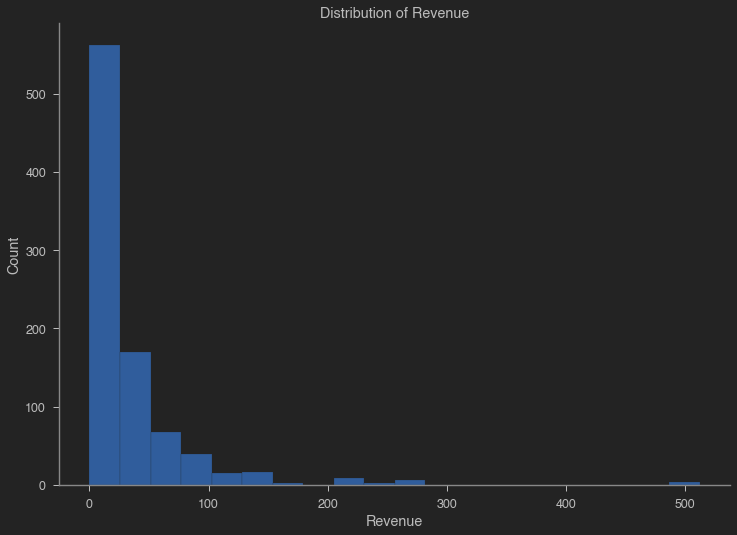

In [6]:
g = sns.displot(task1, x="Revenue", bins=20);
g.fig.set_size_inches(12,8)
plt.title('Distribution of Revenue');

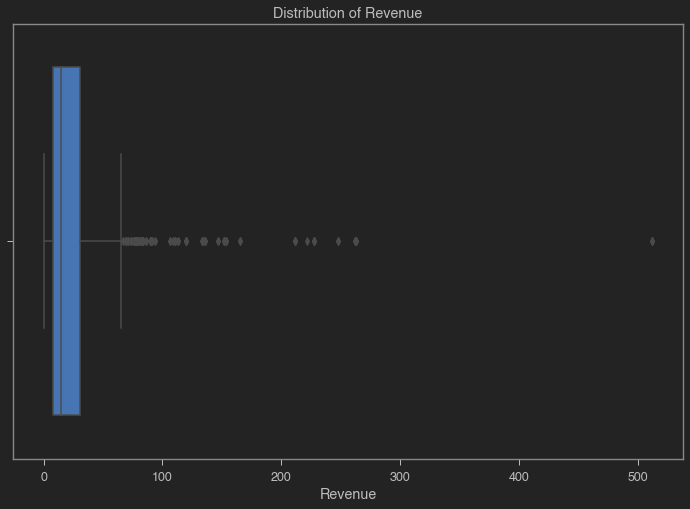

In [7]:
#We can see positive skew and some outliers in Revenue. 
plt.figure(figsize=(12, 8))
sns.boxplot(x=task1["Revenue"]);
plt.title('Distribution of Revenue');

In [8]:
#Printing standart deviation, mean, and median
print("SD:",task1.Revenue.std())
print("Mean:",task1.Revenue.mean())
print("Median:",task1.Revenue.median())

SD: 49.6934285971809
Mean: 32.204207968574636
Median: 14.4542


In [9]:
#Printing quantiles of Revenue
task1.Revenue.quantile([.1, .25, .5, .75])

0.10     7.5500
0.25     7.9104
0.50    14.4542
0.75    31.0000
Name: Revenue, dtype: float64

### Conclusion - 1 
### We have positive skewness in Revenue. This means that about 75% of the customers bring revenue of 
### 30-35 USD, and there is a small group of clients who bring a very large revenue of 50-500 USD.

### My task is to determine who these clients are.

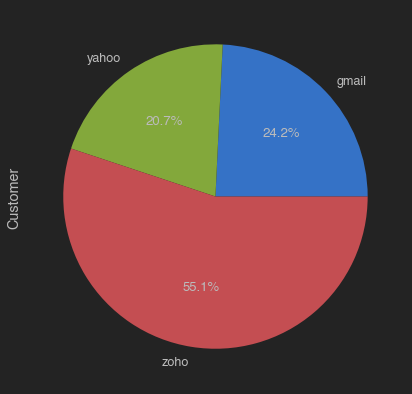

In [10]:
#Customers by ESP. More than half of cutomers is using zoho, the second is gmail with 24.2% and yahoo is used by 20.7% of users.
task1.groupby("ESP")["Customer"].count().plot.pie(autopct="%.1f%%");

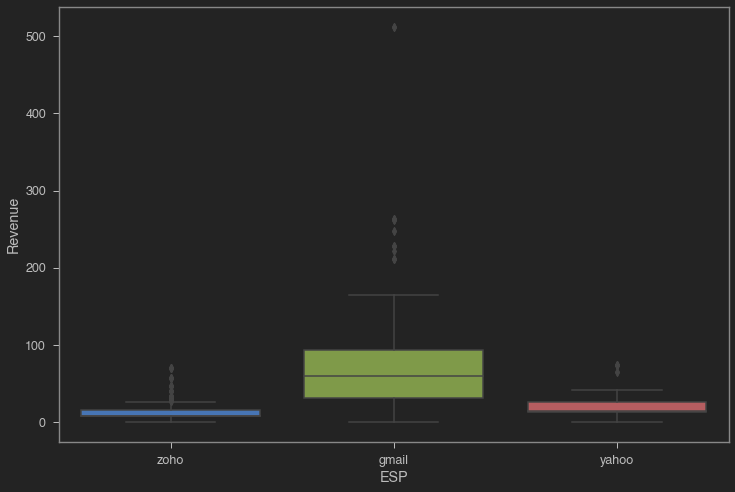

In [11]:
#Let's check distribution of Revenue by ESP.
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'ESP', y = 'Revenue', data = task1);

ESP
gmail    18177.4125
yahoo     3801.8417
zoho      6714.6951
Name: Revenue, dtype: float64


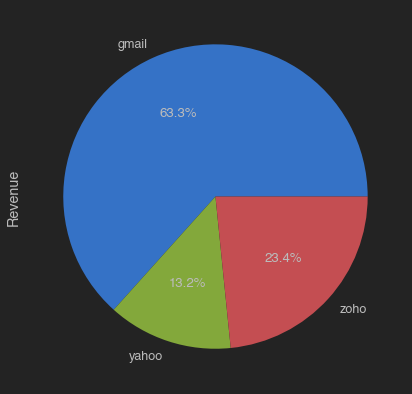

In [12]:
#Printing the Total Revenue from each ESP.
print(task1.groupby("ESP")["Revenue"].sum());
task1.groupby("ESP")["Revenue"].sum().plot.pie(autopct="%.1f%%");

### Conclusion  -2 
### ESP affects Revenue. Customers using gmail bring the most revenue:
### 25% of clients (gmail) - bring 63.3% of the revenue
#### 55.1% of customers (zoho) - bring in 23.4% of revenue
#### 20.7% of customers (yahoo) - generate 13.2% of revenue

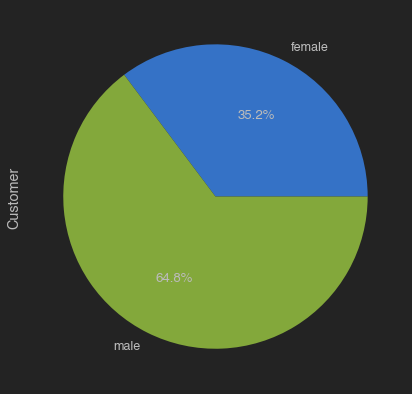

In [13]:
#Customers by Gender. Majority of our customers is male, 64.8% against 35.2%.
task1.groupby("Sex")["Customer"].count().plot.pie(autopct="%.1f%%");

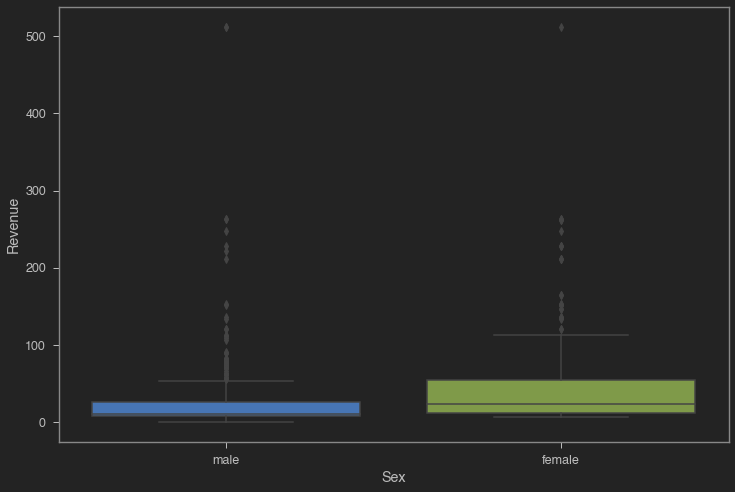

In [14]:
#Distribution of Revenue by Gender. We can see that females bring more Revenue than male customers.
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Sex', y = 'Revenue', data = task1);

Sex
female    13966.6628
male      14727.2865
Name: Revenue, dtype: float64


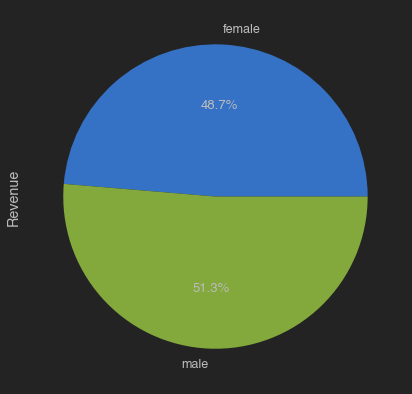

In [15]:
#Printing the Total Revenue from each ESP.
print(task1.groupby("Sex")["Revenue"].sum());
task1.groupby("Sex")["Revenue"].sum().plot.pie(autopct="%.1f%%");

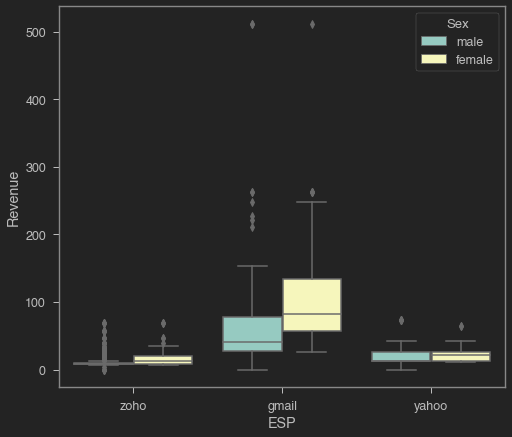

In [16]:
#Female customers using gmail bring most Revenue to Mailbird
ax = sns.boxplot(x="ESP", y="Revenue", hue="Sex",data=task1, palette="Set3");

### Conclusion - 3
### Gender correlates with Revenue. Women bring in 2 times more Revenue than men. 
### Female customers using gmail bring most Revenue to Mailbird.

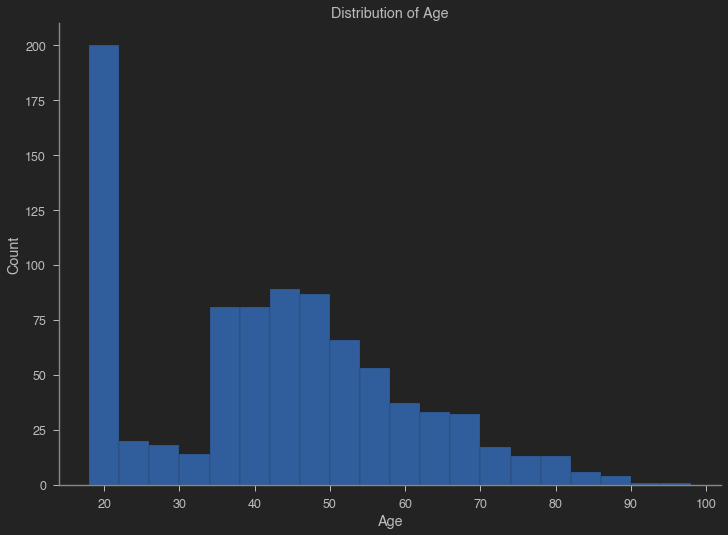

In [17]:
#Distribution of Age among customers
g = sns.displot(task1, x="Age", bins=20);
g.fig.set_size_inches(12,8)
plt.title('Distribution of Age');

In [18]:
#I create a new column "Age binned", because I assume that some age groups can bring more Revenue than others. I will bin them each 10 years.
task1['Age_binned'] = pd.cut(x=task1['Age'], bins=[1, 19, 29, 39, 49, 59, 69, 79, 120], labels=['0-19', '20-29', '30-39', '40-49','50-59','60-69','70-79','80+'])

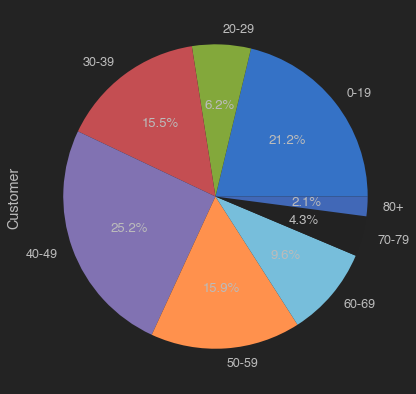

In [19]:
#Age groups in pie chart by number of customers
task1.groupby("Age_binned")["Customer"].count().plot.pie(autopct="%.1f%%");

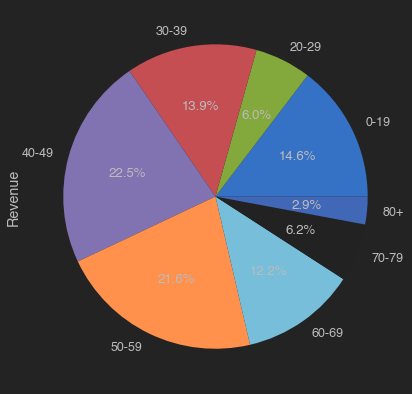

In [20]:
#Age groups in pie chart by Revenue.
task1.groupby("Age_binned")["Revenue"].sum().plot.pie(autopct="%.1f%%");

### Conclusion - 4. 
### Age groups do not greatly affect Revenue, as we can see from previous 2 pie-charts. Percentage of people in the age groups and the amount of revenue they bring is more or less the same. But I will look further in the context of the Age group and gender.

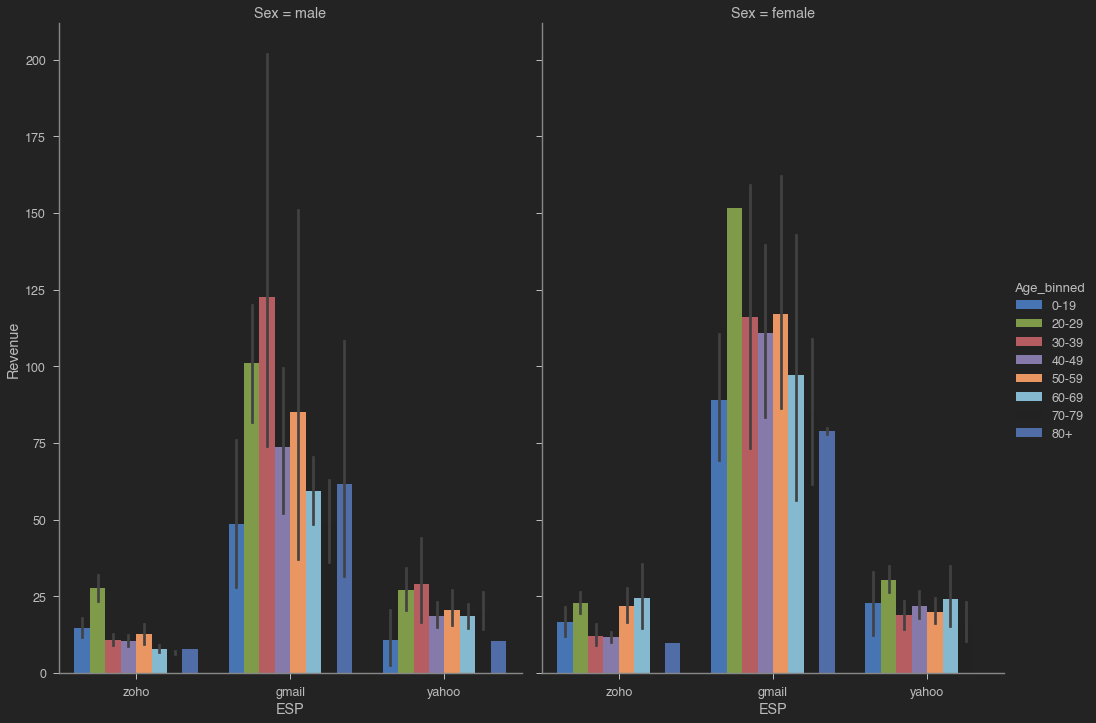

In [21]:
#As we can see, gmail users generate high Revenue. As we have seen earlier, women in all age groups bring more Revenue than men
g = sns.catplot(x="ESP", y="Revenue",
                hue="Age_binned", col="Sex",
                data=task1, kind="bar",
                height=10, aspect=.7);

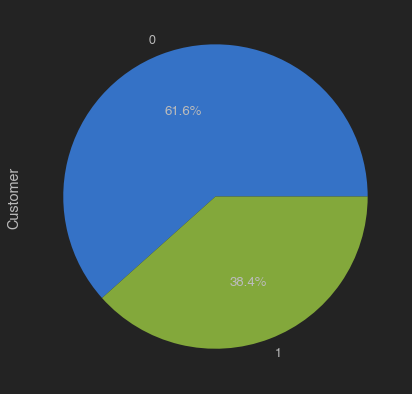

In [22]:
#In the dataset there is another column Customer. This column with 1 and 0 values shows if a customer decided to pay for service or not. 
#I will compare how this factor affects Revenue.

#Majority of users is not paying, 61.6% against 38.4%.
task1.groupby("Customer")["Customer"].count().plot.pie(autopct="%.1f%%");

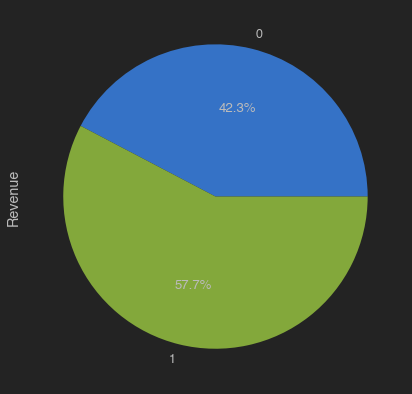

In [23]:
#It is obvious that users paying for the service bring more Revenue.
task1.groupby("Customer")["Revenue"].sum().plot.pie(autopct="%.1f%%");

In [24]:
#I will check if gender is correlated with the decision to pay for mailbird or not?
#First, I will create temporary dataframes
male = task1[task1['Sex']=='male']
female = task1[task1['Sex']=='female']

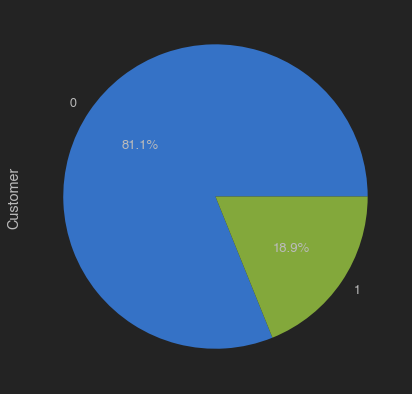

In [25]:
#Male users prefer not to pay for servies - 81.1% of all male users against 18.9%
male.groupby("Customer")["Customer"].count().plot.pie(autopct="%.1f%%");

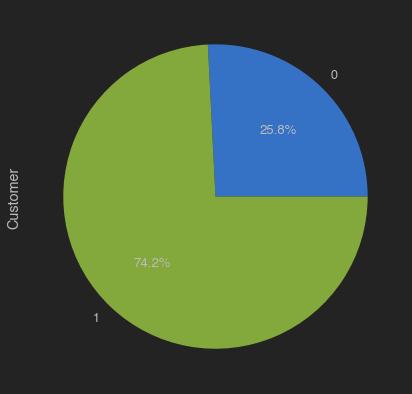

In [26]:
#74.2% of all female users are paying Mailbird.
female.groupby("Customer")["Customer"].count().plot.pie(autopct="%.1f%%");

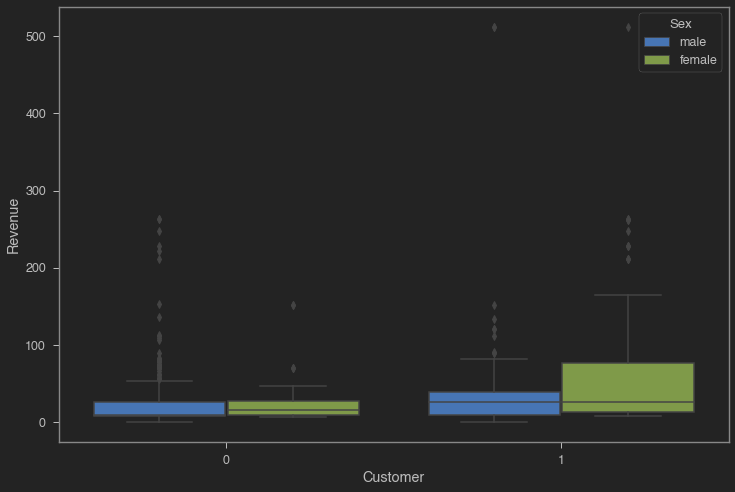

In [27]:
#Distribution of Revenue by paid and free. 
#Obviously, paid subscriptions generate more revenue and as we can see female users again are leaders among generators of revenue. 
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Customer', y = 'Revenue', data = task1, hue="Sex");

### Conclusion 5. 
### Women prefer paid services of Mailbird and bring in more Revenue.

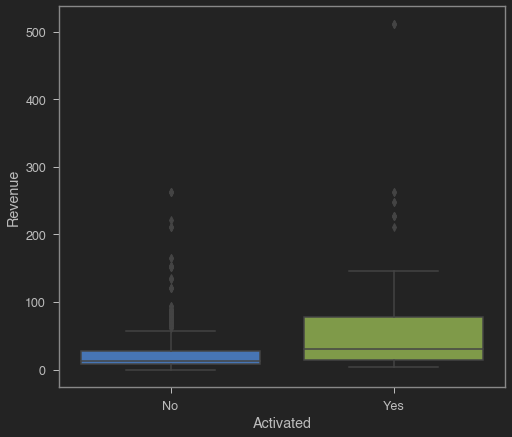

In [28]:
#Another column Activated. These are the users who got to use the right features during their first days.
#My Assumption is users who are "Activated" will bring more Revenue, because they know the value of the product and are ready to pay.
ax = sns.boxplot(x="Activated", y="Revenue", data=task1)

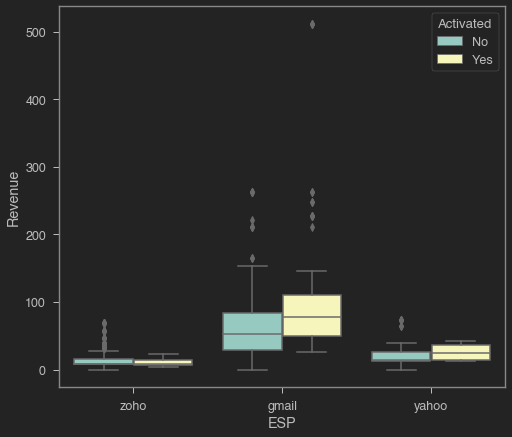

In [29]:
ax = sns.boxplot(x="ESP", y="Revenue", hue="Activated",
                 data=task1, palette="Set3")

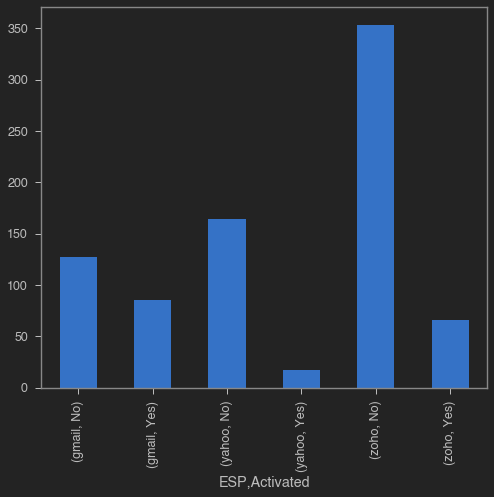

In [39]:
task1.groupby(["ESP", "Activated"])["Activated"].count().plot.bar();

In [32]:
ESP_Activated = task1.groupby(["ESP", "Activated"])["Activated"].count()

ESP_Activated_pct = ESP_Activated.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
ESP_Activated_pct

ESP    Activated
gmail  No           59.905660
       Yes          40.094340
yahoo  No           90.607735
       Yes           9.392265
zoho   No           84.248210
       Yes          15.751790
Name: Activated, dtype: float64

### Conclusion 6.
### Majority of users fom Yahoo (90%) and Zoho (84%) do not use right features of Mailbird.

Sex     Account
female  0           255.5500
        1           737.2001
        2          6744.2169
        3           828.7541
        4          5400.9417
male    0           465.8000
        1           365.3417
        2          8876.5361
        3           620.3500
        4          4399.2587
Name: Revenue, dtype: float64


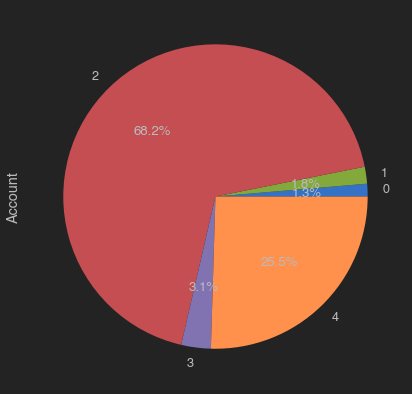

In [33]:
# The last column in dataset is number of Accounts. 68% of customers have 2 accounts and 25.5% have 4 accounts.
task1.groupby("Account")["Account"].count().plot.pie(autopct="%.1f%%");
print(task1.groupby(["Sex","Account"])["Revenue"].sum());

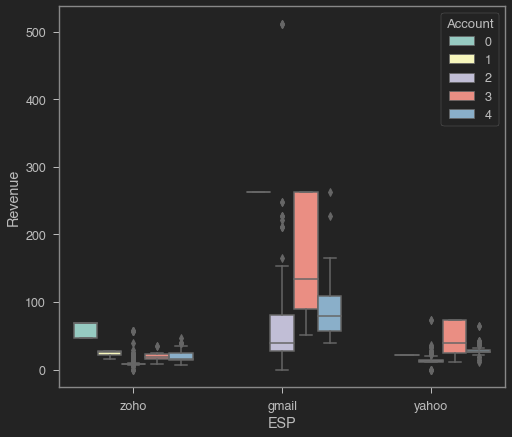

In [34]:
#Distribution of Revenue by Accounts
ax = sns.boxplot(x="ESP", y="Revenue", hue="Account",
                 data=task1, palette="Set3")

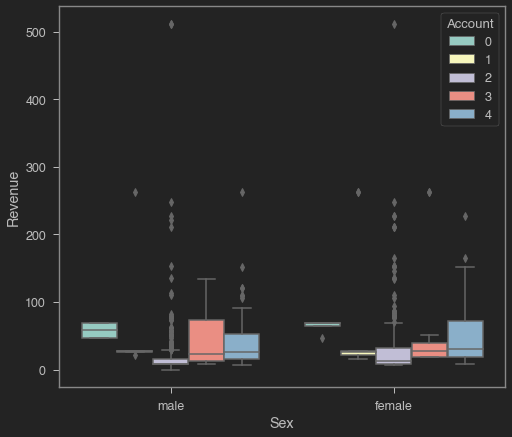

In [35]:
#Distribution of Revenue by Accounts
ax = sns.boxplot(x="Sex", y="Revenue", hue="Account",
                 data=task1, palette="Set3")

### Conclusion 7. 
### Majority of the customers has 2 accounts (68.2%) and the second biggest group has 4 accounts (25.5%). 

# Most of the profit for Mailbird is brought by women users of all ages who prefer gmail.

# Men make up the majority of the clients, but only clients who prefer gmail and have 2 or 4 accounts bring significant profit.

In [ ]:
#I will save this dataframe as csv file and continue data visualization in Flourish Studio
task1.to_csv("task1_flourish.csv", index =False)